# Name: Yuning Lei
# Github username: Thundereggg
# USC ID: 4169712364

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
import xgboost as xgb
from sklearn.model_selection import KFold
from sklearn import model_selection

## 1. Tree-Based Methods

(a) Download the APS Failure data from: https://archive.ics.uci.edu/ml/datasets/APS+Failure+at+Scania+Trucks . The dataset contains a training set and a test
set. The training set contains 60,000 rows, of which 1,000 belong to the positive
class and 171 columns, of which one is the class column. All attributes are numeric.

In [ ]:
train=pd.read_csv('../data/Homework6Data/aps_failure_training_set.csv',skiprows=20,na_values=['na'])
train

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,neg,153002,NaN,6.640000e+02,186.0,0.0,0.0,0.0,0.0,0.0,...,998500.0,566884.0,1290398.0,1218244.0,1019768.0,717762.0,898642.0,28588.0,0.0,0.0
59996,neg,2286,NaN,2.130707e+09,224.0,0.0,0.0,0.0,0.0,0.0,...,10578.0,6760.0,21126.0,68424.0,136.0,0.0,0.0,0.0,0.0,0.0
59997,neg,112,0.0,2.130706e+09,18.0,0.0,0.0,0.0,0.0,0.0,...,792.0,386.0,452.0,144.0,146.0,2622.0,0.0,0.0,0.0,0.0
59998,neg,80292,NaN,2.130706e+09,494.0,0.0,0.0,0.0,0.0,0.0,...,699352.0,222654.0,347378.0,225724.0,194440.0,165070.0,802280.0,388422.0,0.0,0.0


In [ ]:
test=pd.read_csv('../data/Homework6Data/aps_failure_test_set.csv',skiprows=20,na_values=['na'])
test

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,60,0.0,2.000000e+01,12.0,0.0,0.0,0.0,0.0,0.0,...,1098.0,138.0,412.0,654.0,78.0,88.0,0.0,0.0,0.0,0.0
1,neg,82,0.0,6.800000e+01,40.0,0.0,0.0,0.0,0.0,0.0,...,1068.0,276.0,1620.0,116.0,86.0,462.0,0.0,0.0,0.0,0.0
2,neg,66002,2.0,2.120000e+02,112.0,0.0,0.0,0.0,0.0,0.0,...,495076.0,380368.0,440134.0,269556.0,1315022.0,153680.0,516.0,0.0,0.0,0.0
3,neg,59816,NaN,1.010000e+03,936.0,0.0,0.0,0.0,0.0,0.0,...,540820.0,243270.0,483302.0,485332.0,431376.0,210074.0,281662.0,3232.0,0.0,0.0
4,neg,1814,NaN,1.560000e+02,140.0,0.0,0.0,0.0,0.0,0.0,...,7646.0,4144.0,18466.0,49782.0,3176.0,482.0,76.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,neg,81852,NaN,2.130706e+09,892.0,0.0,0.0,0.0,0.0,0.0,...,632658.0,273242.0,510354.0,373918.0,349840.0,317840.0,960024.0,25566.0,0.0,0.0
15996,neg,18,0.0,5.200000e+01,46.0,8.0,26.0,0.0,0.0,0.0,...,266.0,44.0,46.0,14.0,2.0,0.0,0.0,0.0,0.0,0.0
15997,neg,79636,NaN,1.670000e+03,1518.0,0.0,0.0,0.0,0.0,0.0,...,806832.0,449962.0,778826.0,581558.0,375498.0,222866.0,358934.0,19548.0,0.0,0.0
15998,neg,110,NaN,3.600000e+01,32.0,0.0,0.0,0.0,0.0,0.0,...,588.0,210.0,180.0,544.0,1004.0,1338.0,74.0,0.0,0.0,0.0


(b) Data Preparation

This data set has missing values. When the number of data with missing values
is significant, discarding them is not a good idea.

i. Research what types of techniques are usually used for dealing with data with
missing values. Pick at least one of them and apply it to this data in the
next steps.

We usually use data imputation to deal with missing value, fill in with mean, median, or mode. Deleting the whole row is another way. Last observation carried forward is also used.

In [ ]:
train = train.fillna(train.mean())
train

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,0.713189,2.130706e+09,280.000000,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,0.713189,0.000000e+00,190620.639314,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,0.713189,2.280000e+02,100.000000,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,0.000000,7.000000e+01,66.000000,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,0.713189,1.368000e+03,458.000000,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,neg,153002,0.713189,6.640000e+02,186.000000,0.0,0.0,0.0,0.0,0.0,...,998500.0,566884.0,1290398.0,1218244.0,1019768.0,717762.0,898642.0,28588.0,0.0,0.0
59996,neg,2286,0.713189,2.130707e+09,224.000000,0.0,0.0,0.0,0.0,0.0,...,10578.0,6760.0,21126.0,68424.0,136.0,0.0,0.0,0.0,0.0,0.0
59997,neg,112,0.000000,2.130706e+09,18.000000,0.0,0.0,0.0,0.0,0.0,...,792.0,386.0,452.0,144.0,146.0,2622.0,0.0,0.0,0.0,0.0
59998,neg,80292,0.713189,2.130706e+09,494.000000,0.0,0.0,0.0,0.0,0.0,...,699352.0,222654.0,347378.0,225724.0,194440.0,165070.0,802280.0,388422.0,0.0,0.0


In [ ]:
test = test.fillna(test.mean())
test

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,60,0.000000,2.000000e+01,12.0,0.0,0.0,0.0,0.0,0.0,...,1098.0,138.0,412.0,654.0,78.0,88.0,0.0,0.0,0.0,0.0
1,neg,82,0.000000,6.800000e+01,40.0,0.0,0.0,0.0,0.0,0.0,...,1068.0,276.0,1620.0,116.0,86.0,462.0,0.0,0.0,0.0,0.0
2,neg,66002,2.000000,2.120000e+02,112.0,0.0,0.0,0.0,0.0,0.0,...,495076.0,380368.0,440134.0,269556.0,1315022.0,153680.0,516.0,0.0,0.0,0.0
3,neg,59816,0.772065,1.010000e+03,936.0,0.0,0.0,0.0,0.0,0.0,...,540820.0,243270.0,483302.0,485332.0,431376.0,210074.0,281662.0,3232.0,0.0,0.0
4,neg,1814,0.772065,1.560000e+02,140.0,0.0,0.0,0.0,0.0,0.0,...,7646.0,4144.0,18466.0,49782.0,3176.0,482.0,76.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,neg,81852,0.772065,2.130706e+09,892.0,0.0,0.0,0.0,0.0,0.0,...,632658.0,273242.0,510354.0,373918.0,349840.0,317840.0,960024.0,25566.0,0.0,0.0
15996,neg,18,0.000000,5.200000e+01,46.0,8.0,26.0,0.0,0.0,0.0,...,266.0,44.0,46.0,14.0,2.0,0.0,0.0,0.0,0.0,0.0
15997,neg,79636,0.772065,1.670000e+03,1518.0,0.0,0.0,0.0,0.0,0.0,...,806832.0,449962.0,778826.0,581558.0,375498.0,222866.0,358934.0,19548.0,0.0,0.0
15998,neg,110,0.772065,3.600000e+01,32.0,0.0,0.0,0.0,0.0,0.0,...,588.0,210.0,180.0,544.0,1004.0,1338.0,74.0,0.0,0.0,0.0


ii. For each of the 170 features, calculate the coefficient of variation CV = sm,
where s is sample standard deviation and m is sample mean.

In [ ]:
train_features=train.drop(['class'],axis=1)
cv_train=train_features.std()/train_features.mean()
cv_train

aa_000      2.450938
ab_000      2.328400
ac_000      2.169767
ad_000    183.847620
ae_000     23.190937
             ...    
ee_007      4.962483
ee_008      3.222010
ee_009      5.626979
ef_000     47.124953
eg_000     40.553250
Length: 170, dtype: float64

In [ ]:
test_features=test.drop(['class'],axis=1)
cv_test=test_features.std()/test_features.mean()
cv_test

aa_000     7.405254
ab_000     1.598753
ac_000     2.159811
ad_000     3.059255
ae_000    17.984377
            ...    
ee_007     4.593464
ee_008     3.698411
ee_009     6.188841
ef_000    50.690401
eg_000    57.661381
Length: 170, dtype: float64

iii. Plot a correlation matrix for your features using pandas or any other tool.

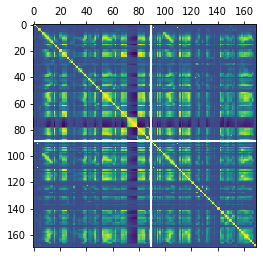

In [ ]:
plt.matshow(train_features.corr())
plt.show()

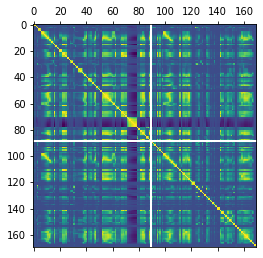

In [ ]:
plt.matshow(test_features.corr())
plt.show()

iv. Pick √170 features with highest CV , and make scatter plots and box plots
for them, similar to those on p. 129 of ISLR. Can you draw conclusions about
significance of those features, just by the scatter plots? This does not mean
that you will only use those features in the following questions. We picked
them only for visualization.

In [ ]:
# Select the top |sqrt128| features
n=int(170**0.5)
cv_train=cv_train.sort_values(ascending=False)
cv_select=cv_train.head(n)
cv_select

cs_009    235.277605
cf_000    184.233092
co_000    183.949017
ad_000    183.847620
dh_000    114.984991
dj_000    109.647285
ag_000     91.878565
as_000     86.416904
ay_009     83.786063
az_009     76.967978
ak_000     74.526688
au_000     68.160554
ch_000     58.268229
dtype: float64

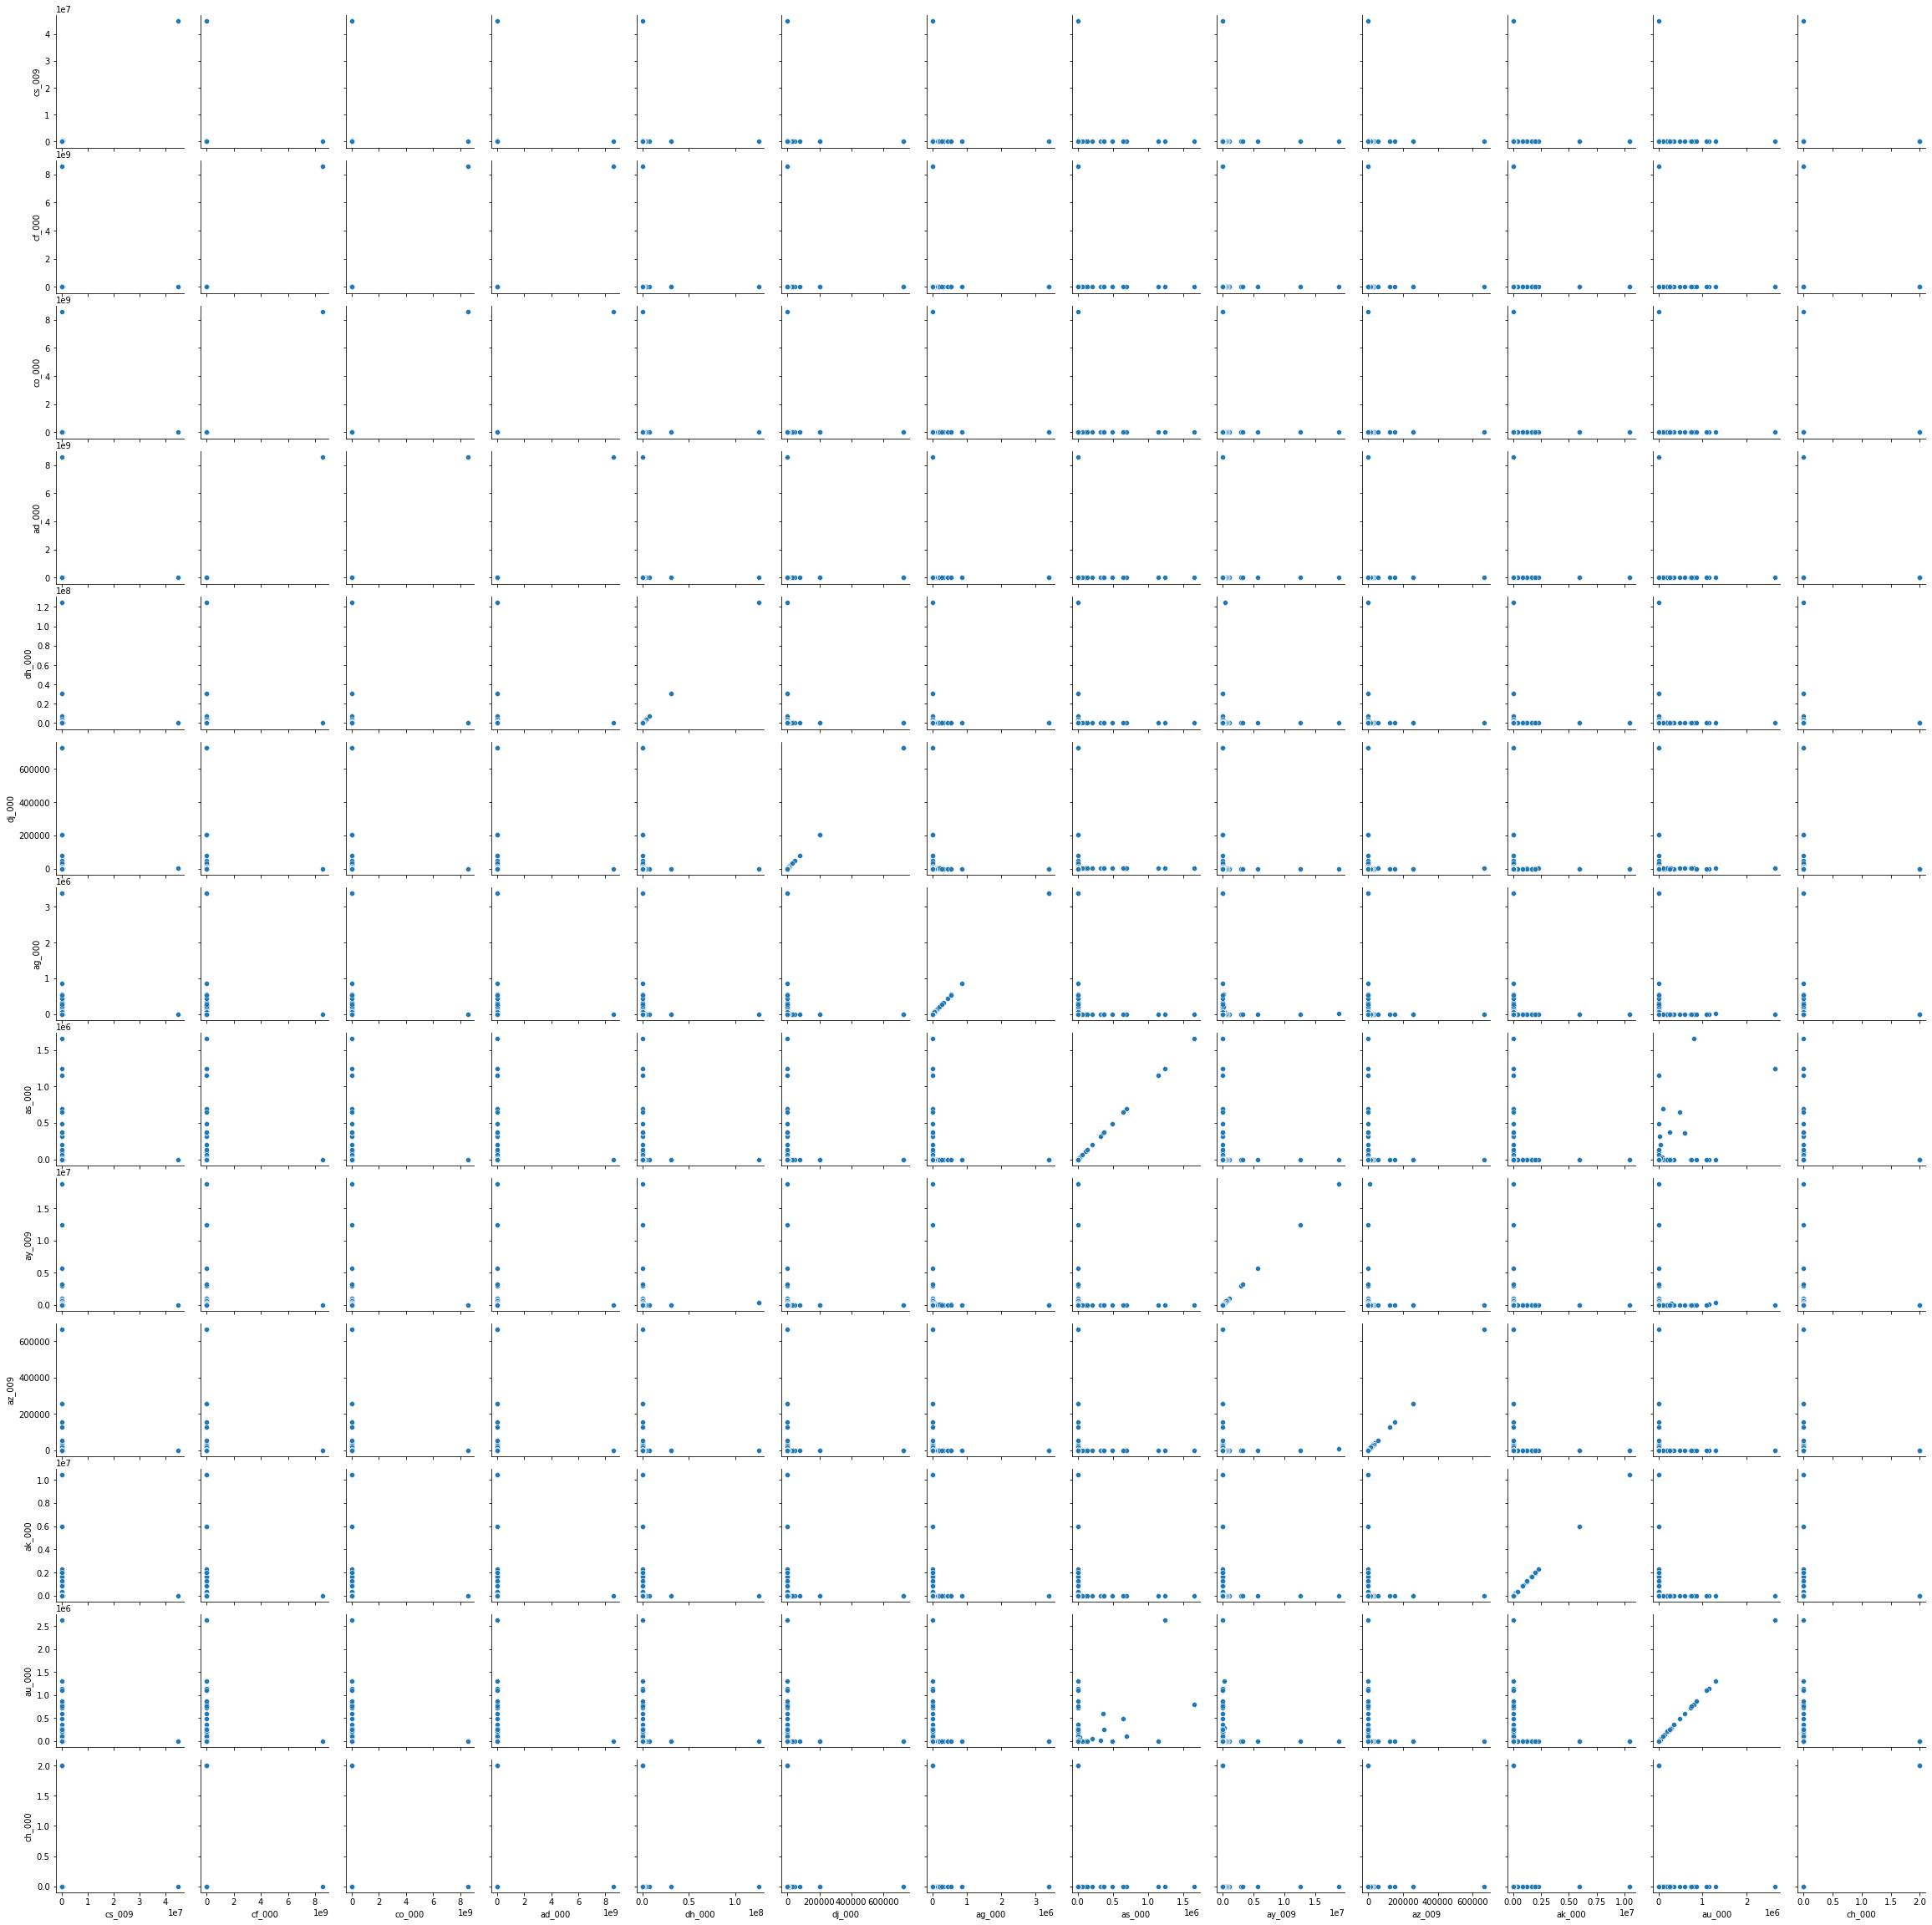

In [ ]:
g = sns.PairGrid(train_features[cv_select.index])
g.map(sns.scatterplot)

There are some positive relations between variables. 

<AxesSubplot:>

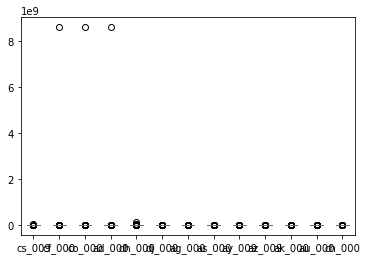

In [ ]:
# Box plot
train_features[cv_select.index].plot.box()

From the boxplot above,we can see that there are outliers in the dataset.

v. Determine the number of positive and negative data. Is this data set imbalanced?

In [ ]:
print(train['class'].value_counts())

neg    59000
pos     1000
Name: class, dtype: int64


(c) Train a random forest to classify the data set. Do NOT compensate for class
imbalance in the data set. Calculate the confusion matrix, ROC, AUC, and
misclassification for training and test sets and report them (You may use pROC
package). Calculate Out of Bag error estimate for your random forset and compare
it to the test error.

In [ ]:
train1=train
train1['class'] = train1['class'].map({'pos': 1, 'neg': 0})
x_train=train1.values[:,1:]
y_train=train1.values[:,0]

In [ ]:
test1=test
test1['class'] = test1['class'].map({'pos': 1, 'neg': 0})
x_test=test1.values[:,1:]
y_test=test1.values[:,0]

In [ ]:
test1

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,60,0.000000,2.000000e+01,12.0,0.0,0.0,0.0,0.0,0.0,...,1098.0,138.0,412.0,654.0,78.0,88.0,0.0,0.0,0.0,0.0
1,0,82,0.000000,6.800000e+01,40.0,0.0,0.0,0.0,0.0,0.0,...,1068.0,276.0,1620.0,116.0,86.0,462.0,0.0,0.0,0.0,0.0
2,0,66002,2.000000,2.120000e+02,112.0,0.0,0.0,0.0,0.0,0.0,...,495076.0,380368.0,440134.0,269556.0,1315022.0,153680.0,516.0,0.0,0.0,0.0
3,0,59816,0.772065,1.010000e+03,936.0,0.0,0.0,0.0,0.0,0.0,...,540820.0,243270.0,483302.0,485332.0,431376.0,210074.0,281662.0,3232.0,0.0,0.0
4,0,1814,0.772065,1.560000e+02,140.0,0.0,0.0,0.0,0.0,0.0,...,7646.0,4144.0,18466.0,49782.0,3176.0,482.0,76.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,0,81852,0.772065,2.130706e+09,892.0,0.0,0.0,0.0,0.0,0.0,...,632658.0,273242.0,510354.0,373918.0,349840.0,317840.0,960024.0,25566.0,0.0,0.0
15996,0,18,0.000000,5.200000e+01,46.0,8.0,26.0,0.0,0.0,0.0,...,266.0,44.0,46.0,14.0,2.0,0.0,0.0,0.0,0.0,0.0
15997,0,79636,0.772065,1.670000e+03,1518.0,0.0,0.0,0.0,0.0,0.0,...,806832.0,449962.0,778826.0,581558.0,375498.0,222866.0,358934.0,19548.0,0.0,0.0
15998,0,110,0.772065,3.600000e+01,32.0,0.0,0.0,0.0,0.0,0.0,...,588.0,210.0,180.0,544.0,1004.0,1338.0,74.0,0.0,0.0,0.0


In [ ]:
clf = RandomForestClassifier(oob_score=True)
clf.fit(x_train,y_train)

RandomForestClassifier(oob_score=True)

In [ ]:
pred_test_y = clf.predict(x_test)
test_error=mean_squared_error(pred_test_y,y_test)
conf_m=confusion_matrix(y_test,pred_test_y)
print('Confusion matrix is \n',conf_m)

Confusion matrix is 
 [[15611    14]
 [  105   270]]


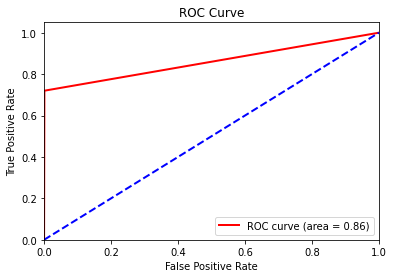

AUC is 0.859552


In [ ]:
fpr, tpr, _ = roc_curve(y_test,pred_test_y)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='red',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='blue', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()
print('AUC is',roc_auc)

In [ ]:
misclf=1 - (float(conf_m[0][0]+conf_m[1][1])/float(conf_m[0][0]+conf_m[1][1]+conf_m[0][1]+conf_m[1][0]))
print('Misclassification is',misclf)
print('Test error is',test_error)

Misclassification is 0.007437499999999986
Test error is 0.0074375


In [ ]:
oob_error = 1 - clf.oob_score_
print('Out of bag error is', oob_error)

Out of bag error is 0.0061833333333333185


Out of bag error is lower than the test error.

(d) Research how class imbalance is addressed in random forests. Compensate for
class imbalance in your random forest and repeat 1c. Compare the results with
those of 1c.

In [ ]:
clf1 = RandomForestClassifier(class_weight = "balanced",oob_score=True)
clf1.fit(x_train,y_train)

RandomForestClassifier(class_weight='balanced', oob_score=True)

In [ ]:
pred_test_y1 = clf1.predict(x_test)
test_error1=mean_squared_error(pred_test_y1,y_test)
conf_m1=confusion_matrix(y_test,pred_test_y1)
print('Confusion matrix is \n',conf_m1)

Confusion matrix is 
 [[15611    14]
 [  156   219]]


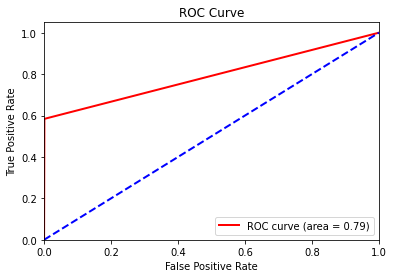

AUC is 0.791552


In [ ]:
fpr1, tpr1, _ = roc_curve(y_test,pred_test_y1)
roc_auc1 = auc(fpr1, tpr1)
plt.figure()
lw = 2
plt.plot(fpr1, tpr1, color='red',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc1)
plt.plot([0, 1], [0, 1], color='blue', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()
print('AUC is',roc_auc1)

In [ ]:
misclf1=1 - (float(conf_m1[0][0]+conf_m1[1][1])/float(conf_m1[0][0]+conf_m1[1][1]+conf_m1[0][1]+conf_m1[1][0]))
print('Misclassification is',misclf1)
print('Test error is',test_error1)

Misclassification is 0.010624999999999996
Test error is 0.010625


In [ ]:
oob_error1 = 1 - clf1.oob_score_
print('Out of bag error is', oob_error1)

Out of bag error is 0.007900000000000018


Out of bag error is lower than the test error. Imbalanced data has lower ROC,AUC and misclassification,but higher out of bag error.

(e) XGBoost and Model Trees

In the case of a univariate tree, only one input dimension is used at a tree split.
In a multivariate tree, or model tree, at a decision node all input dimensions can be used and thus it is more general. In univariate classification trees, majority
polling is used at each node to determine the split of that node as the decision
rule. In model trees, a (linear) model that relies on all of the variables is used
to determine the split of that node (i.e. instead of using Xj > s as the decision
rule, one has Pj βjXj > s. as the decision rule). Alternatively, in a regression
tree, instead of using average in the region associated with each node, a linear
regression model is used to determine the value associated with that node.
One of the methods that can be used at each node is Logistic Regression. Because
the number of variables is large in this problem, one can use L1-penalized logistic
regression at each node. You can use XGBoost to fit the model tree. Determine
α (the regularization term) using cross-validation. Train the model for the APS
data set without compensation for class imbalance. Use one of 5 fold, 10 fold,
and leave-one-out cross validation methods to estimate the error of your trained
model and compare it with the test error. Report the Confusion Matrix, ROC,
and AUC for training and test sets.

In [87]:
from sklearn.model_selection import GridSearchCV

reg=xgb.XGBRegressor(objective='reg:logistic')
params = {
    'reg_alpha': [0.001,0.01,0.02,0.03,0.1],
}

clf = GridSearchCV(
    estimator=reg,
    param_grid=params,
    cv=5,
    n_jobs=5,
    verbose=1
)

In [88]:
clf.fit(x_train,y_train)
print(clf.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
{'reg_alpha': 0.1}


In [90]:
xgbc = xgb.XGBRegressor(objective='reg:logistic',reg_alpha=0.1)
xgbc.fit(x_train, y_train)
pred_test_y2 = xgbc.predict(x_test)
test_error2= mean_squared_error(pred_test_y2,y_test)

In [94]:
l=[]
for i in pred_test_y2:
  if i>0.5:
    l.append(1)
  else:
    l.append(0)
#y_test=np.argmax(y_test,axis=0)
conf_m2=confusion_matrix(y_test,l)
print('Confusion matrix is \n',conf_m2)

Confusion matrix is 
 [[15607    18]
 [  114   261]]


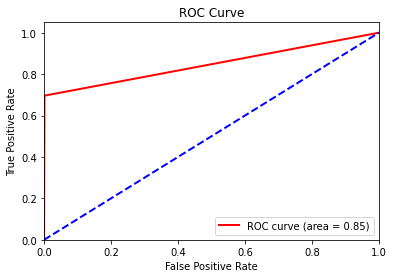

AUC is 0.847424


In [104]:
fpr2, tpr2, _ = roc_curve(y_test,l)
roc_auc2 = auc(fpr2, tpr2)
plt.figure()
lw = 2
plt.plot(fpr2, tpr2, color='red',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc2)
plt.plot([0, 1], [0, 1], color='blue', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()
print('AUC is',roc_auc2)

In [96]:
misclf2=1 - (float(conf_m2[0][0]+conf_m2[1][1])/float(conf_m2[0][0]+conf_m2[1][1]+conf_m2[0][1]+conf_m2[1][0]))
print('Misclassification is',misclf2)
print('Test error is',test_error2)

Misclassification is 0.00824999999999998
Test error is 0.006305508876585103


(f) Use SMOTE (Synthetic Minority Over-sampling Technique) to pre-process your
data to compensate for class imbalance. Train XGBosst with L1-penalized logistic regression at each node using the pre-processed data and repeat 1e. Do not
forget that there is a right and a wrong way of cross validation here. Compare
the uncompensated case with SMOTE case.

In [100]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
x_res, y_res = sm.fit_resample(x_train, y_train)
reg1=xgb.XGBRegressor(objective='reg:logistic')
params = {
    'reg_alpha': [0.001,0.01,0.02,0.03,0.1],
}

clf4 = GridSearchCV(
    estimator=reg,
    param_grid=params,
    cv=5,
    n_jobs=5,
    verbose=1
)

In [101]:
clf4.fit(x_res,y_res)
print(clf4.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
{'reg_alpha': 0.03}


In [111]:
xgbc1 = xgb.XGBRegressor(objective='reg:logistic',reg_alpha=0.03)
xgbc1.fit(x_res, y_res)
pred_test_y3 = xgbc1.predict(x_test)
test_error3= mean_squared_error(pred_test_y3,y_test)

In [112]:
l2=[]
for i in pred_test_y3:
  if i>0.5:
    l2.append(1)
  else:
    l2.append(0)
#y_test=np.argmax(y_test,axis=0)
conf_m3=confusion_matrix(y_test,l2)
print('Confusion matrix is \n',conf_m3)

Confusion matrix is 
 [[15117   508]
 [   22   353]]


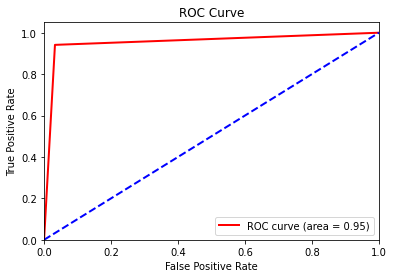

AUC is 0.9544106666666666


In [113]:
fpr3, tpr3, _ = roc_curve(y_test,l2)
roc_auc3 = auc(fpr3, tpr3)
plt.figure()
lw = 2
plt.plot(fpr3, tpr3, color='red',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc3)
plt.plot([0, 1], [0, 1], color='blue', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()
print('AUC is',roc_auc3)

In [114]:
misclf3=1 - (float(conf_m3[0][0]+conf_m3[1][1])/float(conf_m3[0][0]+conf_m3[1][1]+conf_m3[0][1]+conf_m3[1][0]))
print('Misclassification is',misclf3)
print('Test error is',test_error3)

Misclassification is 0.03312499999999996
Test error is 0.025034042465295215


AUC, ROC, misclassification, and test error increased after SMOTE...

## Reference

5. https://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html